In [ ]:
#Drive bağladık.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
import xgboost as xgb
from xgboost import plot_importance
import time

In [ ]:
#Python'da bir dizin ve alt dizinlerindeki dosya ve klasör yapılarını dolaşmak (tarama yapmak) için kullanılır.
#Sonra dosyanın tam yolu ile birliştirilir.
for dirname, _, filenames in os.walk('/content/drive/MyDrive/CIC-IDS- 2017_Dataset/CIC-IDS- 2017'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/CIC-IDS- 2017_Dataset/CIC-IDS- 2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/content/drive/MyDrive/CIC-IDS- 2017_Dataset/CIC-IDS- 2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/content/drive/MyDrive/CIC-IDS- 2017_Dataset/CIC-IDS- 2017/Friday-WorkingHours-Morning.pcap_ISCX.csv
/content/drive/MyDrive/CIC-IDS- 2017_Dataset/CIC-IDS- 2017/Monday-WorkingHours.pcap_ISCX.csv
/content/drive/MyDrive/CIC-IDS- 2017_Dataset/CIC-IDS- 2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/content/drive/MyDrive/CIC-IDS- 2017_Dataset/CIC-IDS- 2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/content/drive/MyDrive/CIC-IDS- 2017_Dataset/CIC-IDS- 2017/Tuesday-WorkingHours.pcap_ISCX.csv
/content/drive/MyDrive/CIC-IDS- 2017_Dataset/CIC-IDS- 2017/Wednesday-workingHours.pcap_ISCX.csv


In [ ]:
#CICIDS2017 veri setini okuyun
#Görselleştirme Seçeneklerini Ayarlama
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None

#Veri Setlerini Okuma
df1 =pd.read_csv("/content/drive/MyDrive/CIC-IDS- 2017_Dataset/CIC-IDS- 2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df2 =pd.read_csv("/content/drive/MyDrive/CIC-IDS- 2017_Dataset/CIC-IDS- 2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df3 =pd.read_csv("/content/drive/MyDrive/CIC-IDS- 2017_Dataset/CIC-IDS- 2017/Monday-WorkingHours.pcap_ISCX.csv")
df4 =pd.read_csv("/content/drive/MyDrive/CIC-IDS- 2017_Dataset/CIC-IDS- 2017/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df5 = pd.read_csv("/content/drive/MyDrive/CIC-IDS- 2017_Dataset/CIC-IDS- 2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6 = pd.read_csv("/content/drive/MyDrive/CIC-IDS- 2017_Dataset/CIC-IDS- 2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7 = pd.read_csv("/content/drive/MyDrive/CIC-IDS- 2017_Dataset/CIC-IDS- 2017/Tuesday-WorkingHours.pcap_ISCX.csv")
df8 = pd.read_csv("/content/drive/MyDrive/CIC-IDS- 2017_Dataset/CIC-IDS- 2017/Wednesday-workingHours.pcap_ISCX.csv")

#Veri Setlerini Birleştirme
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8

#Sütun İsimlerini Temizleme
df.columns = df.columns.str.strip()
#Veri Boyutunu Kontrol Etme
nRow, nCol = df.shape
print(f'The table has {nRow} rows and {nCol} columns')




The table has 2830743 rows and 79 columns


In [ ]:
df.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7595.104640,67.122468,15075.50000,104051.399700,948537,0,1266342,31658.550,159355.2595,996324,2,317671,7387.697674,19636.44809,104616,1,0,0,0,0,1328,1424,32.376720,34.745748,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7289.936810,64.425518,15706.58333,104861.870100,955790,1,1319353,32983.825,159247.9008,996423,1,363429,8451.837209,21337.26261,104815,1,0,0,0,0,1328,1424,31.075838,33.349680,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,12500.000000,160.00000,0.000000,160,160,0,0.000,0.0000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,32,32,6250.000000,6250.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,976,0,157.952381,319.121427,7182.267884,63.675308,15896.19512,106554.899000,956551,0,1303488,32587.200,160397.0499,997357,1,346851,8459.780488,23962.23892,138295,0,0,0,0,0,1328,1360,31.454068,32.221240,0,976,111.452381,241.642791,58391.23867,0,0,0,1,0,0,0,0,1,112.795181,66.536585,157.952381,1328,0,0,0,0,0,0,41,2728,42,6634,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,38961.038960,38.50000,14.849242,49,28,0,0.000,0.0000,0,0,49,49.000000,0.00000,49,49,0,0,0,0,32,64,12987.012990,25974.025970,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,2,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
#Hangi sınıfların veri setinde ne kadar temsil edildiğini görmenizi sağlar.
df.Label.value_counts()

,count
Label,
BENIGN,2273097
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


In [ ]:
#Yeniden etiketleme
label_mapping = {
    'BENIGN': 'Normal',
    'Bot': 'Botnet',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'DoS Hulk': 'DoS/DDoS',
    'DoS GoldenEye': 'DoS/DDoS',
    'DoS slowloris': 'DoS/DDoS',
    'DoS Slowhttptest': 'DoS/DDoS',
    'DDoS': 'DoS/DDoS',
    'Heartbleed': 'DoS/DDoS',
    'Infiltration': 'Infiltration',
    'PortScan': 'Port Scan',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack'
}

df['Label'] = df['Label'].map(label_mapping)

In [ ]:
#Her benzersiz değeri sayar.
#Sonuçları azalan sırada sıralar (en çok tekrarlanan sınıf en üstte olur).
df.Label.value_counts()

,count
Label,
Normal,2273097
DoS/DDoS,380699
Port Scan,158930
Brute Force,13835
Web Attack,2180
Botnet,1966


In [ ]:
#Rastgele örnekleme
from sklearn.utils import resample


#Veri çerçevesindeki Infiltration sınıfı kaldırılır.
df = df[df['Label'] != 'Infiltration']

# Her sınıf için örnek boyut aralığını tanımlayın
#Örnek Boyut Aralığını Tanımlama
min_samples = 2000
max_samples = 2200
# [min_samples, max_samples] aralığında rastgele örnekleme işlevi
#Rastgele Örnekleme Fonksiyonu
def random_sample_class(df, label, min_samples, max_samples):
    n_samples = np.random.randint(min_samples, max_samples + 1)
    return resample(df[df['Label'] == label], n_samples=n_samples, random_state=42)

# Yeniden örneklesnecek etiketleri tanımlayın
#Örneklenmesi Gereken Etiketleri Tanımlama
class_labels = ['Normal', 'DoS/DDoS', 'Port Scan', 'Brute Force']

# Random_sample sınıf fonksiyonunu her sınıfa uygulayın
resampled_dfs = [random_sample_class(df, label, min_samples, max_samples) for label in class_labels] #Her sınıf için bu fonksiyon çağrılarak, belirlenen aralıktaki rastgele örnek sayısı kadar veri seçilir.
df_resampled = pd.concat(resampled_dfs + [df[df['Label'] == label] for label in df['Label'].unique() if label not in class_labels])  #Örnekleme yapılmayan sınıfları (class_labels listesinde olmayanları) seçer ve bunları olduğu gibi tutar.
df = df_resampled #df artık yeni oluşturulan örneklenmiş veri çerçevesine atanır.

print(df['Label'].value_counts()) #her sınıftaki örnek sayısını döndürür.

Label
Brute Force    2187
Web Attack     2180
DoS/DDoS       2075
Normal         2054
Port Scan      2020
Botnet         1966
Name: count, dtype: int64


** **kalın metin**Ön işleme (normalleştirme ve dolgu değerleri)**


In [ ]:
# Min-max normalizasyonu
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Boş değerleri 0'a kadar doldur
df = df.fillna(0)

In [ ]:
#bölünmüş tren seti ve test seti
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0,stratify = y)

In [ ]:
pd.Series(y_train).value_counts()

**SMOTE ile aşırı örnekleme (Rastgele örnekleme kullanıldığı için kullanılmadı)**


In [ ]:
#Sonradan vazgeçildi kullanımından.
#from imblearn.over_sampling import SMOTE
#smote=SMOTE(n_jobs=-1,sampling_strategy={3:1100}) # Create 1100 samples for the minority class "3"
#X_train, y_train = smote.fit_resample(X_train, y_train)

Makine öğrenimi modeli eğitimi
**Dört temel öğrenicinin eğitimi: ***decision tree, random forest, extra trees, XGBoost***


Decision tree

Accuracy of DT: 0.9538050734312417
Precision of DT: 0.9578081051576443
Recall of DT: 0.9538050734312417
F1-score of DT: 0.9540948013993259
Training time: 0.12183952331542969 s
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       590
           1       0.99      1.00      1.00       656
           2       0.85      1.00      0.92       623
           3       0.94      0.89      0.92       616
           4       1.00      0.93      0.96       606
           5       0.99      0.91      0.95       654

    accuracy                           0.95      3745
   macro avg       0.96      0.95      0.95      3745
weighted avg       0.96      0.95      0.95      3745



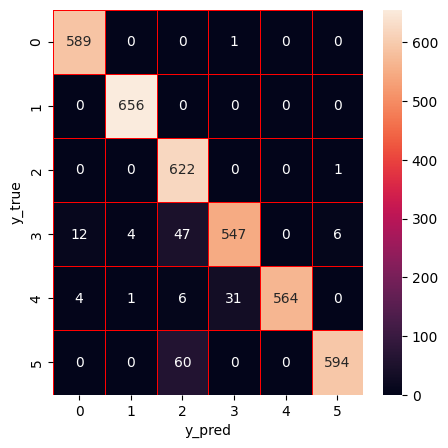

In [ ]:
# Karar ağacı eğitimi ve tahmini
import time

start_time = time.time()
dt = DecisionTreeClassifier(criterion='gini', splitter= 'best', max_depth=5)
dt.fit(X_train,y_train)
training_time = time.time() - start_time

dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print("Training time:", training_time, "s")
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [ ]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Random Forest


Accuracy of RF: 0.962082777036048
Precision of RF: 0.9637189991650911
Recall of RF: 0.962082777036048
F1-score of RF: 0.9616312017071432
Training time: 0.9794411659240723 s
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       590
           1       0.92      1.00      0.96       656
           2       0.94      0.98      0.96       623
           3       0.98      0.86      0.92       616
           4       1.00      0.99      1.00       606
           5       0.99      0.94      0.97       654

    accuracy                           0.96      3745
   macro avg       0.96      0.96      0.96      3745
weighted avg       0.96      0.96      0.96      3745



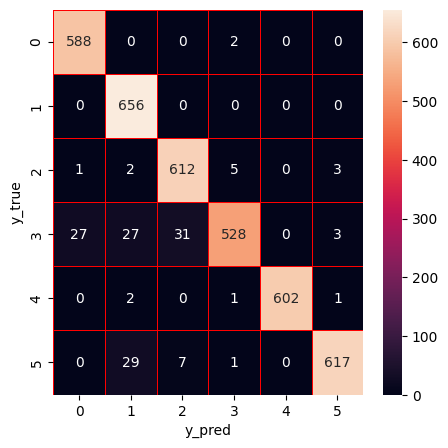

In [ ]:
start_time = time.time()

# Random Forest training and prediction
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5)
rf.fit(X_train,y_train)
training_time = time.time() - start_time

rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print("Training time:", training_time, "s")
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 0.897196261682243
Precision of ET: 0.9122922112761249
Recall of ET: 0.897196261682243
F1-score of ET: 0.8960291616353787
Training time: 0.41733455657958984 s
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       590
           1       0.73      1.00      0.85       656
           2       1.00      0.72      0.83       623
           3       0.92      0.77      0.84       616
           4       0.97      0.99      0.98       606
           5       0.94      0.91      0.93       654

    accuracy                           0.90      3745
   macro avg       0.91      0.90      0.90      3745
weighted avg       0.91      0.90      0.90      3745



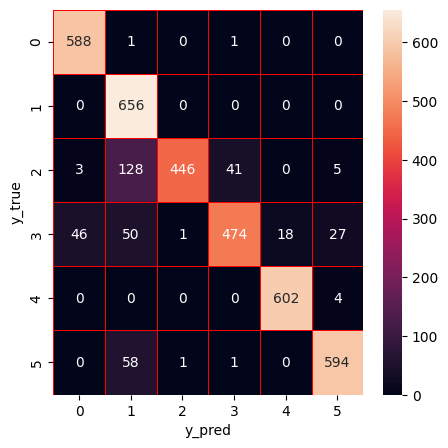

In [ ]:
start_time = time.time()

# Ekstra ağaç eğitimi ve tahmini
et = ExtraTreesClassifier(max_depth=5)
et.fit(X_train,y_train)
training_time = time.time() - start_time

et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print("Training time:", training_time, "s")
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 0.9887850467289719
Precision of XGBoost: 0.9887898957396754
Recall of XGBoost: 0.9887850467289719
F1-score of XGBoost: 0.9887634456550171
Training time: 0.28057169914245605 s
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       590
           1       0.99      1.00      1.00       656
           2       1.00      0.99      0.99       623
           3       0.98      0.96      0.97       616
           4       1.00      0.99      1.00       606
           5       0.98      0.99      0.99       654

    accuracy                           0.99      3745
   macro avg       0.99      0.99      0.99      3745
weighted avg       0.99      0.99      0.99      3745



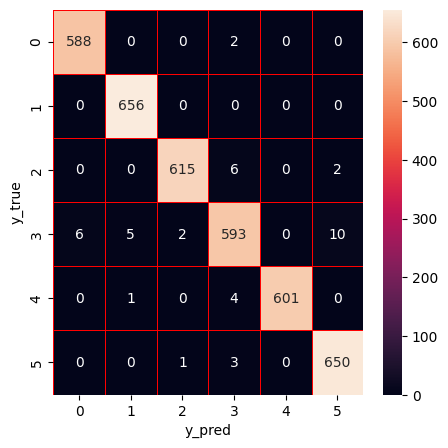

In [ ]:
start_time = time.time()


# XGBoost eğitimi ve tahmini
xg = xgb.XGBClassifier(n_estimators=3)
xg.fit(X_train, y_train)
training_time = time.time() - start_time

xg_score = xg.score(X_test, y_test)
y_predict = xg.predict(X_test)
y_true = y_test
print('Accuracy of XGBoost: ' + str(xg_score))

# Hassasiyeti, geri çağırmayı ve F1 puanını hesaplayın
precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: ' + str(precision))
print('Recall of XGBoost: ' + str(recall))
print('F1-score of XGBoost: ' + str(fscore))
print("Training time:", training_time, "s")

# Sınıflandırma raporunu yazdır
print(classification_report(y_true, y_predict))


# Karışıklık matrisini çizin
cm = confusion_matrix(y_true, y_predict)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

Yığınlama modeli yapımı (4 temel öğrenici için topluluk)
//Bundan sonraki ekstra olarak yapılmıştır ve bir kaç deneme yapılmış olup, özellikleri ayıklayarak yapılmıştır.



---

\\\\\\

> Blok alıntı ekle

> Blok alıntı ekle

> Blok alıntı ekle







In [ ]:
# Yeni bir topluluk modeli oluşturmak için 4 temel modelin çıktılarını kullanın
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

In [ ]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [ ]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

In [ ]:
start_time = time.time()
stk = xgb.XGBClassifier().fit(x_train, y_train)
training_time = time.time() - start_time

y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print("Training time:", training_time, "s")
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Özellik Seçimi


In [ ]:
# Dört ağaç tabanlı algoritma tarafından oluşturulan özellik önem listelerini kaydedin
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xgb_feature = xg.feature_importances_

In [ ]:

# her özelliğin ortalama önem değerini hesaplayın
avg_feature = (dt_feature + rf_feature + et_feature + xgb_feature)/4

In [ ]:
feature=(df.drop(['Label'],axis=1)).columns.values
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True))

In [ ]:
f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)

In [ ]:
len(f_list)

In [ ]:
# Birikmiş önem 0,9'a (1 üzerinden) ulaşana kadar önemli özellikleri en önemliden en düşük öneme kadar seçin
Sum=0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if Sum>=0.9:
        break

In [ ]:
len(fs)

In [ ]:
X_fs = df[fs].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.7, test_size = 0.3, random_state = 0,stratify = y)

In [ ]:
X_train.shape

In [ ]:
pd.Series(y_train).value_counts()

Özellik seçiminden sonra makine öğrenimi modeli eğitimi


In [ ]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

In [ ]:
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

In [ ]:
et = ExtraTreesClassifier(max_depth=5)
et.fit(X_train,y_train)
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

In [ ]:
xg = xgb.XGBClassifier(n_estimators = 3)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

Yığınlama modeli yapımı


In [ ]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

In [ ]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [ ]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

In [ ]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()